In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from akita_utils.format_io import h5_to_df
from scipy import stats

In [2]:
# python collect_jobs_and_clean.py /scratch2/smaruj/shifted_permutation_m0_s+10000 -g -l -n

In [3]:
stat_names = ["SCD", "SSD", "INS-16", "INS-64"]

In [4]:
data_dir = "/project/fudenber_735/akitaX1_analyses_data/genomic_disruption_experiment/shifted_permutations"

In [5]:
# reading h5 files to dataframes
df_central = h5_to_df("/project/fudenber_735/akitaX1_analyses_data/genomic_disruption_experiment/disruption_by_permutation/model_0.h5", stat_names, average=False) 

df_n10k = h5_to_df(data_dir+"/model_0_shift_n10000.h5", stat_names, average=False) 
df_n1k = h5_to_df(data_dir+"/model_0_shift_n1000.h5", stat_names, average=False) 
df_n100 = h5_to_df(data_dir+"/model_0_shift_n100.h5", stat_names, average=False) 
df_n10 = h5_to_df(data_dir+"/model_0_shift_n10.h5", stat_names, average=False) 
df_n1 = h5_to_df(data_dir+"/model_0_shift_n1.h5", stat_names, average=False) 

df_p10k = h5_to_df(data_dir+"/model_0_shift_p10000.h5", stat_names, average=False) 
df_p1k = h5_to_df(data_dir+"/model_0_shift_p1000.h5", stat_names, average=False) 
df_p100 = h5_to_df(data_dir+"/model_0_shift_p100.h5", stat_names, average=False) 
df_p10 = h5_to_df(data_dir+"/model_0_shift_p10.h5", stat_names, average=False) 
df_p1 = h5_to_df(data_dir+"/model_0_shift_p1.h5", stat_names, average=False) 

In [6]:
def average_stat(df, shift, model_index, head_index, stat="SCD"):
    if head_index == 1:
        target_indices = 6
    else:
        target_indices = 5
        
    df[f"{stat}_{shift}"] = df[[f"{stat}_h{head_index}_m{model_index}_t{target_index}" for target_index in range(target_indices)]].mean(axis=1)
    return df

In [7]:
df_central = average_stat(df_central, shift="cen", model_index=0, head_index=1)

df_n10k = average_stat(df_n10k, shift="n10k", model_index=0, head_index=1)
df_n1k = average_stat(df_n1k, shift="n1k", model_index=0, head_index=1)
df_n100 = average_stat(df_n100, shift="n100", model_index=0, head_index=1)
df_n10 = average_stat(df_n10, shift="n10", model_index=0, head_index=1)
df_n1 = average_stat(df_n1, shift="n1", model_index=0, head_index=1)

df_p10k = average_stat(df_p10k, shift="p10k", model_index=0, head_index=1)
df_p1k = average_stat(df_p1k, shift="p1k", model_index=0, head_index=1)
df_p100 = average_stat(df_p100, shift="p100", model_index=0, head_index=1)
df_p10 = average_stat(df_p10, shift="p10", model_index=0, head_index=1)
df_p1 = average_stat(df_p1, shift="p1", model_index=0, head_index=1)

In [8]:
SCD_collected = pd.concat([df_central["SCD_cen"], 
                           df_n10k["SCD_n10k"],
                           df_n1k["SCD_n1k"],
                           df_n100["SCD_n100"],
                           df_n10["SCD_n10"],
                           df_n1["SCD_n1"],
                           df_p10k["SCD_p10k"],
                          df_p1k["SCD_p1k"],
                          df_p100["SCD_p100"],
                          df_p10["SCD_p10"],
                          df_p1["SCD_p1"]], axis=1)

Text(0, 0.5, 'aveSCD, shifted by 10kb')

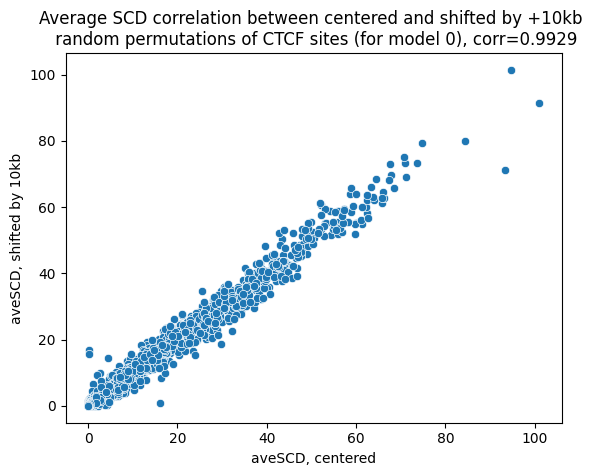

In [9]:
sn.scatterplot(x=SCD_collected["SCD_cen"], y=SCD_collected["SCD_p10k"])
perm_corr = round(stats.pearsonr(SCD_collected["SCD_cen"], SCD_collected["SCD_p10k"]).statistic, 4)
plt.title(f"Average SCD correlation between centered and shifted by +10kb \n random permutations of CTCF sites (for model 0), corr={perm_corr}")
plt.xlabel("aveSCD, centered")
plt.ylabel("aveSCD, shifted by 10kb")

In [10]:
shifts = ["10k", "1k", "100", "10", "1"]

Text(0.5, 0.98, 'Correlations between SCD scores depending on shift')

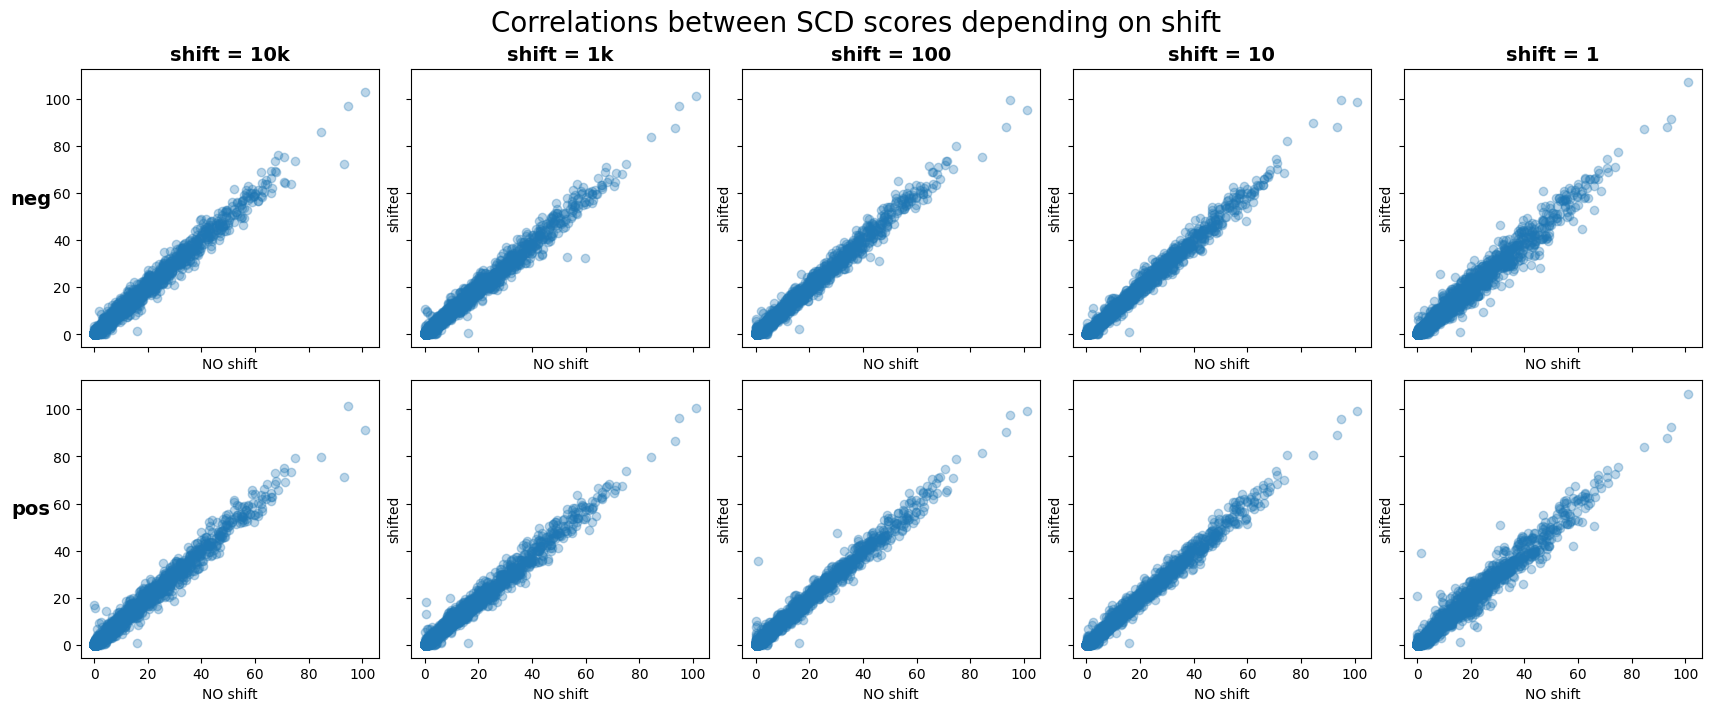

In [11]:
SCD_corr_summary = np.zeros((2, 5))

fig, axs = plt.subplots(2, 5, figsize=(17, 7), sharex=True, sharey=True, layout="constrained")

stat = "SCD"
wt = np.array(SCD_collected["SCD_cen"])

for shift_index in range(len(shifts)):
    
    shift = shifts[shift_index]
    
    neg_shift = np.array(SCD_collected[f"{stat}_n{shift}"])
    pos_shift = np.array(SCD_collected[f"{stat}_p{shift}"])
    
    SCD_corr_summary[0, shift_index] = stats.pearsonr(wt, neg_shift).statistic
    SCD_corr_summary[1, shift_index] = stats.pearsonr(wt, pos_shift).statistic
        
    axs[0, shift_index].scatter(x=wt, y=neg_shift, alpha=0.3)
    axs[1, shift_index].scatter(x=wt, y=pos_shift, alpha=0.3)
    
    axs[0, shift_index].set_xlabel("NO shift")
    axs[0, shift_index].set_ylabel("shifted")
    
    axs[1, shift_index].set_xlabel("NO shift")
    axs[1, shift_index].set_ylabel("shifted")
    
col_names = [f"shift = {i}" for i in shifts]

for ax, col in zip(axs[0], col_names):
    ax.set_title(col, size=14, fontdict=dict(weight="bold"))
    
row_names = ["neg", "pos"]
    
for ax, row in zip(
    axs[:, 0],
    row_names,
):
    ax.set_ylabel(row, rotation=0, fontsize=14, labelpad=10, fontdict=dict(weight="bold"))
    
fig.suptitle("Correlations between SCD scores depending on shift", fontsize=20)

In [12]:
SCD_corr_summary

array([[0.99357026, 0.99324852, 0.99497244, 0.99533115, 0.98953244],
       [0.99289577, 0.99365353, 0.99406814, 0.99555098, 0.98900936]])